In [1]:
import requests 
from bs4 import BeautifulSoup as bs
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
realme_mob=[]

In [3]:
for i in range (1,26):
    ip=[]
    url ="https://www.amazon.in/product-reviews/B09BFMV7NR/ref=cm_cr_arp_d_viewpnt_lft?ie=UTF8&filterByStar=positive&reviewerType=all_reviews&pageNumber="+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    realme_mob = realme_mob+ip

In [4]:
with open("realme.txt","w",encoding = 'utf-8') as output:
    output.write(str(realme_mob))

In [5]:
realme_mob

['\n\n\n\n\n                    The media could not be loaded.\n                \n\n\n\n\xa0Look very smart high ram touch very smooth no hanging battery time long\n',
 '\nGud\n',
 '\n👍👍\n',
 '\nProduct as good as new\n',
 "\nThis model doesn't have inbuilt fm, which disappointed me. Camera quality is also not great. Battery comes for only one day\n"]

In [6]:
import os
os.getcwd()

'C:\\Users\\vikra\\EXCELER'

In [7]:
red_rev_string = " ".join(realme_mob)

In [8]:
red_rev_string = re.sub("[^A-Za-z" "]+"," ",red_rev_string).lower()
red_rev_string =re.sub("[0-9" "]+"," ",red_rev_string)

In [9]:
red_rev_string

' the media could not be loaded look very smart high ram touch very smooth no hanging battery time long gud product as good as new this model doesn t have inbuilt fm which disappointed me camera quality is also not great battery comes for only one day '

In [10]:
red_rev_words = red_rev_string.split(" ")

In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vikra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
red_rev_words = [w for w in red_rev_words if not w in stop_words]

In [13]:
red_rev_string =" ".join(red_rev_words)

In [14]:

wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(red_rev_string)

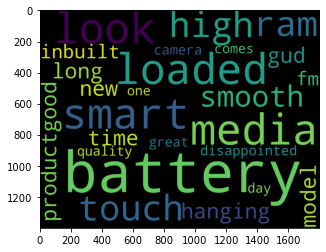

In [15]:
plt.imshow(wordcloud_ip)

In [16]:
with open("C:\\Users\\vikra\\OneDrive\\Desktop\\Data scince assignment\\Assignment\\Text mining\\negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

In [17]:
negwords =negwords[37:]

In [18]:
red_pos = " ".join([w for w in red_rev_words if w in negwords])

In [19]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(red_pos)

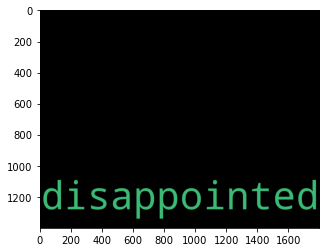

In [20]:
plt.imshow(wordcloud_pos)

In [21]:
red_unique = list(set(" ".join(realme_mob).split(" ")))

In [22]:
red_unique

['',
 'hanging',
 "doesn't",
 'also',
 'great.',
 'loaded.\n',
 'ram',
 '\nProduct',
 'high',
 'comes',
 'smooth',
 'no',
 'The',
 'Battery',
 'time',
 'fm,',
 '\n👍👍\n',
 'one',
 'inbuilt',
 'smart',
 'as',
 'model',
 'disappointed',
 'Camera',
 'be',
 'media',
 '\n\n\n\n\xa0Look',
 '\n\n\n\n\n',
 'which',
 'long\n',
 '\nGud\n',
 '\nThis',
 'me.',
 'not',
 'touch',
 'new\n',
 'for',
 'day\n',
 'is',
 'have',
 'could',
 'very',
 'quality',
 'only',
 'battery',
 'good']

## Emotion mining 

In [23]:
import pandas as pd
afinn = pd.read_csv(r'C:\Users\vikra\OneDrive\Desktop\Data science\Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [24]:
from nltk import tokenize
red_unique = tokenize.sent_tokenize(" ".join(realme_mob))
red_unique[5:15]

[]

In [25]:
sent_df = pd.DataFrame(red_unique, columns=['word'])
sent_df

,word
0,\n\n\n\n\n The media could ...
1,Look very smart high ram touch very smooth no ...
2,Camera quality is also not great.
3,Battery comes for only one day


In [26]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [27]:
import spacy
spacy.load('en_core_web_sm')
from spacy.lang.en import English

In [28]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

In [29]:
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        word = nlp(text)
        for word in red_unique:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [31]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [32]:
calculate_sentiment(text = 'amazing')

4

In [33]:
sent_df['sentiment_value'] = sent_df['word'].apply(calculate_sentiment)

In [34]:
sent_df['word_count'] = sent_df['word'].str.split().apply(len)
sent_df['word_count'].head(10)

0     6
1    29
2     6
3     6
Name: word_count, dtype: int64

In [35]:
sent_df.sort_values(by='sentiment_value')

,word,sentiment_value,word_count
0,\n\n\n\n\n The media could ...,0,6
3,Battery comes for only one day,0,6
1,Look very smart high ram touch very smooth no ...,1,29
2,Camera quality is also not great.,3,6


In [36]:
sent_df['sentiment_value'].describe()

count    4.000000
mean     1.000000
std      1.414214
min      0.000000
25%      0.000000
50%      0.500000
75%      1.500000
max      3.000000
Name: sentiment_value, dtype: float64

In [37]:
sent_df[sent_df['sentiment_value']<=0].head()

,word,sentiment_value,word_count
0,\n\n\n\n\n The media could ...,0,6
3,Battery comes for only one day,0,6


In [38]:
sent_df[sent_df['sentiment_value']>=0].head()

,word,sentiment_value,word_count
0,\n\n\n\n\n The media could ...,0,6
1,Look very smart high ram touch very smooth no ...,1,29
2,Camera quality is also not great.,3,6
3,Battery comes for only one day,0,6


In [39]:
sent_df['index']=range(0,len(sent_df))

C:\Users\vikra\VikramPY\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

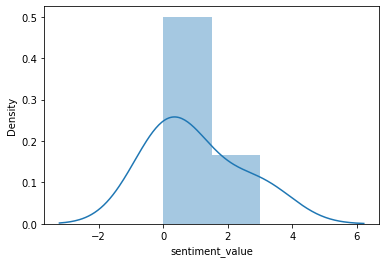

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

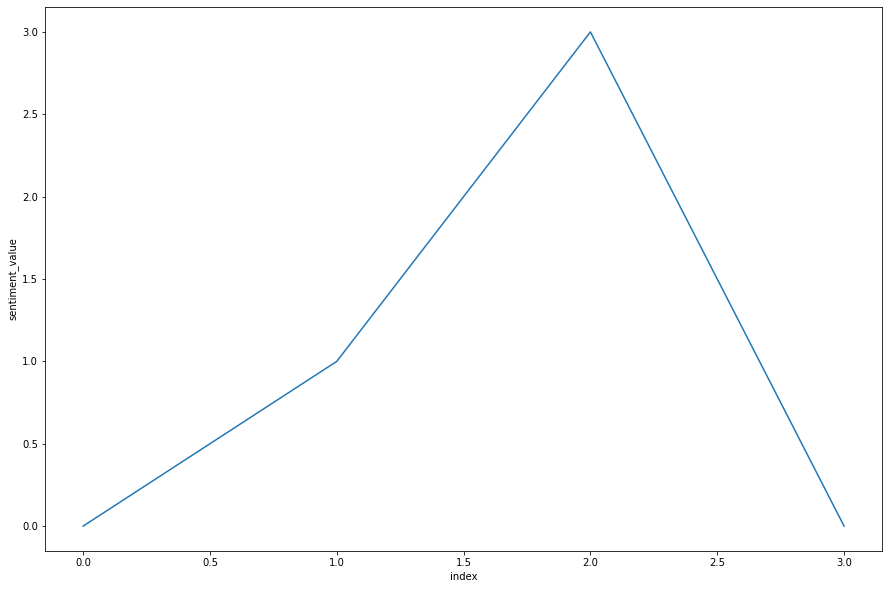

In [41]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

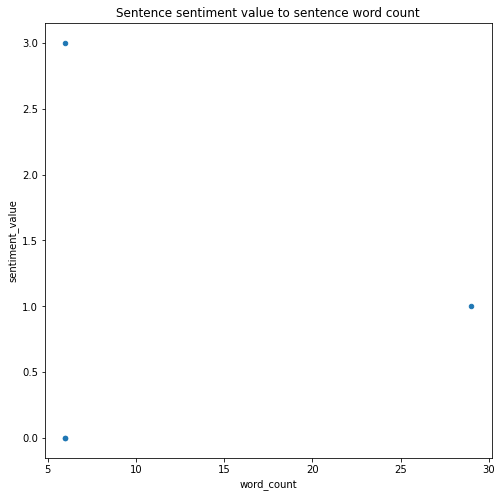

In [42]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')